In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import  font_manager, rc
import seaborn as sns #시각화를 쉽게 만들어줌

# rc('font',family=font_name)
from matplotlib.pylab import rcParams

rcParams['font.family']='AppleGothic' #malgul gothic
rcParams['figure.figsize']=17,8
import warnings
warnings.filterwarnings('ignore') 


## 1.구분인자를 기준으로 파일에 데이터 나누기 : red = pd.read_csv("winequality-red.csv", sep = ";")

In [2]:
red = pd.read_csv("winequality-red.csv", sep = ";")
red["type"] = 0
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [3]:
white = pd.read_csv("winequality-white.csv", sep = ";")
white["type"] = 1 #red와 구분하려고 설정
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [4]:
print(red.shape, white.shape)

(1599, 13) (4898, 13)


## 2.하나의 데이터프레임으로 합치기 : wine = pd.concat([red, white], axis = 0)
- axis = 0 : 열을 기준으로 묶음(똑같은 열을 합치고 행은 그대로 둠)
- ingnore_index = True : 기존 인덱스를 무시하고 새로운 인덱스를 넣어줘

In [5]:
wine = pd.concat([red, white], ignore_index=True)
wine.head()
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,1


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


## 3.원하는 컬럼의 고유값 찾기 :wine.quality.unique()

In [7]:
wine.quality.unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

## 4.위 quality를 오름차순으로 정렬하기

In [8]:
a = np.sort(wine.quality.unique())
# np.to_list(a)
a

array([3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [9]:
sorted(wine.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

## 5.각 등급별 개수 구하기

In [10]:
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

# EDA : 탐색적 분석

## 6.컬럼명에 있는 띄어쓰기 "_"로 바꾸기

In [11]:
wine.columns = wine.columns.str.replace(" ", "_")
wine.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0


## 7.각 정보 분석값 요약 : describe()

In [12]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


## 8.그룹별 분석, 와인종류에 따라 품질이 얼마나 다를까?

In [13]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


## 9.type별 등급이 얼마나 차이나는지 확인하기

In [14]:
wine.groupby("type")["quality"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
0,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
1,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


## 10.아래와 같이 그래프 만들기(히스토그램+정규분포)
- distplot

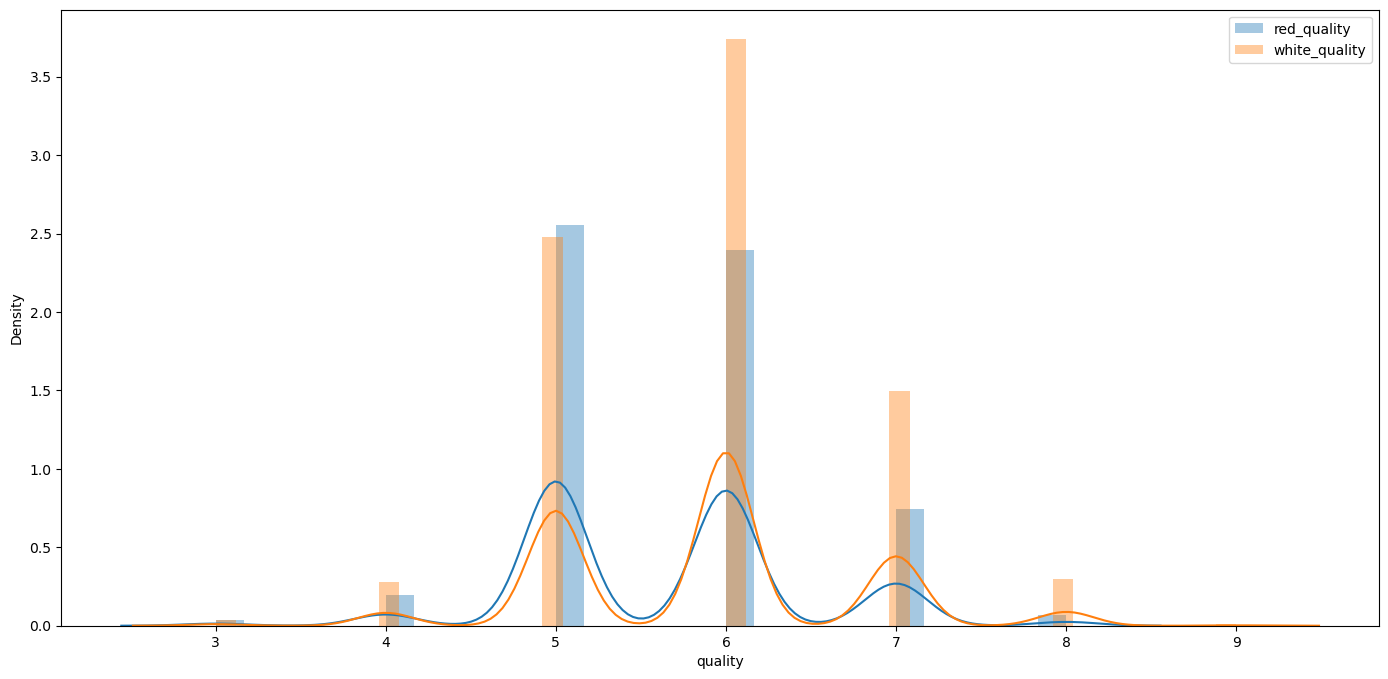

In [26]:
red_quality = wine.loc[wine.type==0, 'quality']
# wine[wine.type == 0].quality
white_quality = wine.loc[wine.type==1, 'quality']

sns.distplot(red_quality, label = "red_quality")
sns.distplot(white_quality, label = "white_quality") 

plt.legend()

# T검정
- 와인 종류에 따른 품질의 차이가 통계적으로 유의한지 알기위해 사용
- p-value < 0.05 : 95%이상의 신뢰수준으로 두그룹간 품질의 차이가 통계적으로 유의하다
- 0.0000000 : 99.9999999% 신뢰수준

In [30]:
import statsmodels.api as sm

In [33]:
t, pvalue, df = sm.stats.ttest_ind(red_quality, white_quality)
"T값은 %.3f 이고, p-value는 %.10f"%(t, pvalue)

'T값은 -9.686 이고, p-value는 0.0000000000'

## 11.Correlation 중 quality만 가져오기 : corrwith(기준열)

In [36]:
wine.corrwith(wine.quality).sort_values()

density                -0.305858
volatile_acidity       -0.265699
chlorides              -0.200666
fixed_acidity          -0.076743
total_sulfur_dioxide   -0.041385
residual_sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free_sulfur_dioxide     0.055463
citric_acid             0.085532
type                    0.119323
alcohol                 0.444319
quality                 1.000000
dtype: float64

## 12.산점도 그래프

In [37]:
# 레드와인 300개, 화이트와인 300개를 램덤 샘플링

In [59]:
import random

red_random = np.random.randint(0, 1599, size=300)
# wine.iloc[red_random,:]

white_random = np.random.randint(1599, 6497, size=300)
# wine.iloc[white_random,:]

In [45]:
wine[wine.type == 0]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [66]:
def sampling(data, n = 300):
    return data.loc[np.random.choice(data.index, replace=False, size=n)]

red = wine[wine.type == 0]
white = wine[wine.type == 1]

red_sample = sampling(red)
white_sample = sampling(white)

#red_sample랑 white_sample 합치기
all = pd.concat([red_sample, white_sample])
all.shape


(600, 13)

### 12-1.pairplot 그리기

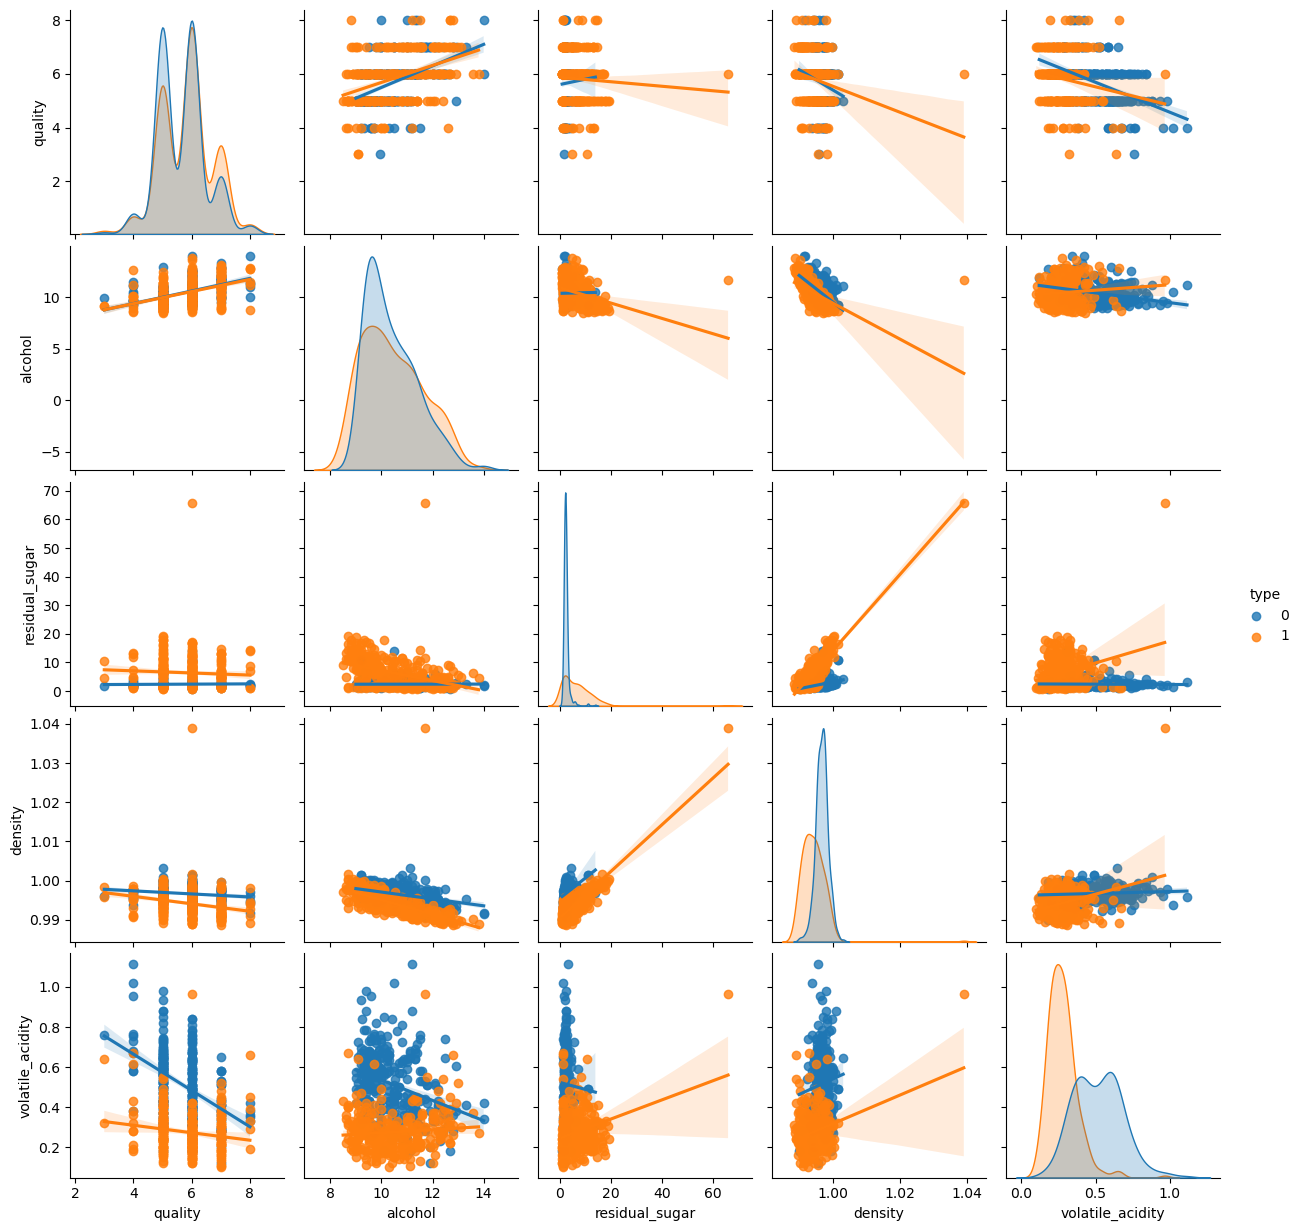

In [75]:
sns.pairplot(all,
             kind = "reg",
             hue = "type",
             vars = ["quality", "alcohol", "residual_sugar", "density", "volatile_acidity"]
            )

In [69]:
white_sample

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
4401,5.6,0.150,0.31,5.3,0.038,8.0,79.0,0.99230,3.30,0.39,10.5,6,1
3160,9.1,0.280,0.49,2.0,0.059,10.0,112.0,0.99580,3.15,0.46,10.1,5,1
5326,5.7,0.265,0.28,6.9,0.036,46.0,150.0,0.99299,3.36,0.44,10.8,7,1
6050,6.3,0.300,0.19,7.7,0.049,47.0,184.0,0.99514,3.22,0.48,9.5,5,1
3833,7.2,0.230,0.38,6.1,0.067,20.0,90.0,0.99496,3.17,0.79,9.7,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3417,6.0,0.260,0.29,1.0,0.032,27.0,96.0,0.98960,3.38,0.44,12.3,6,1
2470,7.7,0.340,0.58,11.1,0.039,41.0,151.0,0.99780,3.06,0.49,8.6,5,1
5724,6.3,0.170,0.23,5.7,0.048,44.0,147.0,0.99382,3.08,0.54,10.0,5,1
1723,6.4,0.130,0.47,1.6,0.092,40.0,158.0,0.99280,3.21,0.36,9.8,6,1
